<a href="https://colab.research.google.com/github/Evans-Karani/AI-system-to-predict-patient-readmission-risk/blob/main/hospital_readmission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()


Saving diabetic_data.csv.zip to diabetic_data.csv.zip


In [3]:
import zipfile

with zipfile.ZipFile("diabetic_data.csv.zip", 'r') as zip_ref:
    zip_ref.extractall()


In [4]:
import pandas as pd

df = pd.read_csv("diabetic_data.csv")
df.head()  # Show first 5 rows


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("Readmitted value counts:\n", df['readmitted'].value_counts())


Shape: (101766, 50)
Columns: ['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']
Readmitted value counts:
 readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64


In [6]:
df['target'] = df['readmitted'].apply(lambda x: 1 if x == '<30' else 0)


In [7]:
drop_cols = ['encounter_id', 'patient_nbr', 'readmitted']
df = df.drop(columns=drop_cols)


In [8]:
df = df.replace('?', pd.NA)

# Drop columns with too many missing values
df = df.drop(columns=['weight', 'payer_code', 'medical_specialty'])


In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype(str)  # Ensure all are strings
    df[col] = le.fit_transform(df[col])


In [10]:
X = df.drop(columns=['target'])
y = df['target']


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [12]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(random_state=42, n_estimators=100)

# Fit the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [13]:
# Predict on test set
y_pred = model.predict(X_test)


In [14]:
from sklearn.metrics import classification_report, confusion_matrix

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[18073    10]
 [ 2246    25]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     18083
           1       0.71      0.01      0.02      2271

    accuracy                           0.89     20354
   macro avg       0.80      0.51      0.48     20354
weighted avg       0.87      0.89      0.84     20354



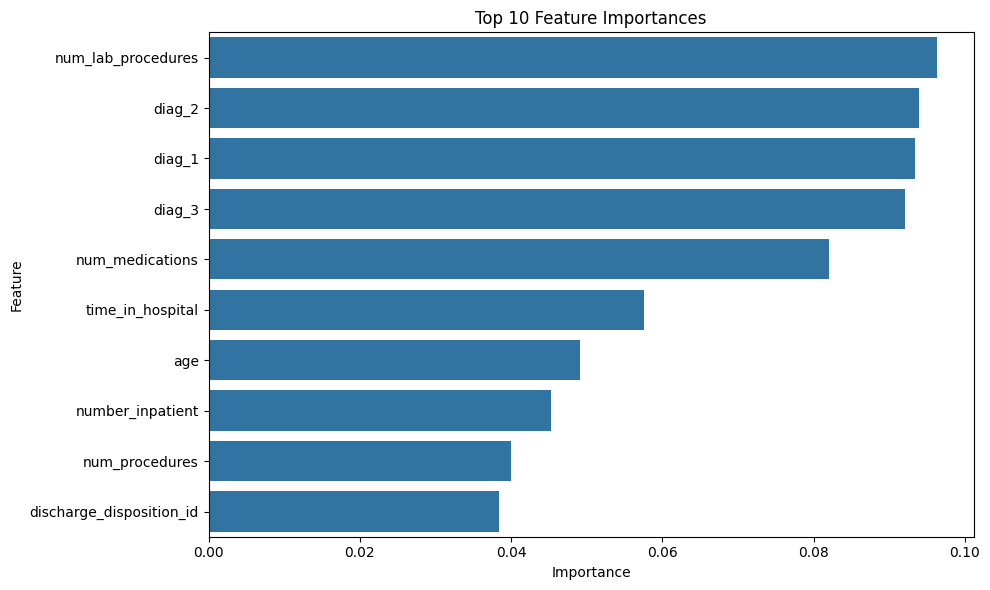

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance
importances = model.feature_importances_
feature_names = X.columns

feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_df, x='Importance', y='Feature')
plt.title("Top 10 Feature Importances")
plt.tight_layout()
plt.show()


In [16]:
import joblib

# Save the trained model
joblib.dump(model, 'readmission_model.pkl')


['readmission_model.pkl']

In [17]:
loaded_model = joblib.load('readmission_model.pkl')
loaded_model.predict(X_test[:5])


array([0, 0, 0, 0, 0])